# Title

## Objectives: 
1. Choose a real-world phenomenon that can be measured.
2. Investigate the types of variables involved, their likely distributions, and their
relationships with each other, accross at least 4 variables.
3. Synthesise/simulate a data set as closely matching their properties as possible.


<br>

## Real World Phenomenon
***

### Hypertension
This project will explore *hypertension*, which is more commonly known as high blood pressure. This real world problem can result in stroke, heart<br>
disease and heart attacks. Blood pressure is measured using systolic blood pressure which measures the pressure in ones arteries when their heart<br>
beats, and diastolic blood pressure which measures the pressure in ones artetries between heart beats [1]. The Centers for Disease Control and<br>
Prevention defines hypertension as a systolic reading of ≥ 130 mmHg and/or a diastolic reading of ≥ 80 mmHg.



<br>

## Investigating the Variables
***
### Selection:
It is important to investigate relevant features when modeling ones data. For example in Machine Learning feature selection methods are used to<br>
reduce the number of input variables to useful ones that can make better predictions (Brownlee 2020). With this in mind some of the feature variables<br> 
that help predict hypertension will now be investigated before deciding what variables will be used  to model the real world phenomenon of hypertension.

Justin et al.(2013) detail how 467 abstracts related to hypertension were closely examined and how 11 articles of 467 were indentified that explored<br>
linear regression prediction models with incident hypertension as their outcome of interest. The results of these article showed that the following<br>
variables showed success in prediciting hypertension over a diverse age range: age, sex, body mass index, diabetes status, parental hypertension<br>
smoking and systolic/diastolic blood pressure. 

Further research identified a large scale study that was carried out by Ren et al (2020) on 68980 Chinese participants over a dynamic age range.<br>
Within the study sample circa 50% of the people had hypertension and risk factor were identified via random forest and linear regression models.<br>
The main risk factors identified were gender, age, height, weight, BMI, triglyceride levels and total cholesterol. <br>




Boledovičová et al. (2013) 

The variables described in table 1 will be selected to model a hypertension dataset and the variable types are also declared, these will play an imortant <br>
partin modelling the data.


# talk about different variables type....
Hossian, Z, 2020, Get Familiar with the Most Powerful Weapon of Data Science Variables, Available at:<br>
[Ref Link X:](https://towardsdatascience.com/get-familiar-with-the-most-important-weapon-of-data-science-variables-48cc7cd85dc5) (Accessed 13 December 2021).
<br>


# 2 x paper references 
Papathanasiou, G et al. (2015)



<table style = 'float : left;'>
    <thead>
      <tr>
        <th></th>
        <th>Table1 (Variable Summary)</th>
        <th></th>
      </tr>
      <tr>
        <th></th>
        <th>Table1 (Variable Summary)</th>
        <th></th>
      </tr>
      <tr>
        <th>Variable Type</th>
        <th>Variable</th>
        <th>Units</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>Continuous</td>
        <td>Systolic Blood Pressure (BPs)</td>
        <td>[mmHg]</td>
      </tr>
      <tr>
        <td>Continuous</td>
        <td>Systolic Blood Pressure (BPs)</td>
        <td>[mmHg]</td>
      </tr>
      <tr>
        <td>Continuous</td>
        <td>BMI</td>
        <td>[kg/m²]</td>
      </tr>
      <tr>
        <td>Discrete</td>
        <td>Age</td>
        <td>Years</td>
      </tr>
      <tr>
        <td>Categorical</td>
        <td>Sex</td>
        <td>-</td>
      </tr>
      <tr>
        <td>Categorical</td>
        <td>Smoker</td>
        <td>-</td>
      </tr>
    </tbody>
 </table>

In [1]:
#Table 1 wil be useful for deducing incident rate to evaluate most important variables to model.
## https://www.ahajournals.org/doi/10.1161/HYPERTENSIONAHA.120.16354

# gives dist tables (not for each sex, doesnt do correlation stats)
#https://www.hindawi.com/journals/ijhy/2018/4186496/

## looks at dist tables for age, weight, height, bmi, heart rate in young greek adults, also does lienar regression etc....
#https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4378027/


## Assumptions for pearsons correlation etc....(needs to be normally dist....use spearman if not)
# https://journals.lww.com/anesthesia-analgesia/fulltext/2018/05000/correlation_coefficients__appropriate_use_and.50.aspx

## Bivariate normal distributed is important for pearsons......
# https://www.statisticshowto.com/bivariate-normal-distribution/
#hist / scatter overlap regplot i think shows this 

# variable references:
https://bradpilon.com/weight-loss/body-fat-when-average-isnt-good-enough/   body fat percent fairly normal
    
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1636707/        bmi slight right skew

### Distribution:

### Correlation:

Importance of drawing samples from distribution, as mean and std dev alone can not determine an accurate distribution
https://en.wikipedia.org/wiki/Anscombe%27s_quartet


link to paper: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3728227/
Normality of variables distribution was checked and found satisfactorily


what variables are important for each variables .... how are they related?....

<table style = 'float : left;'>
<tr><th>Male Statistics </th><th>Female Statistics</th></tr>
<tr><td>

|Variable| Mean | Std Dev|
|--|--|--|
|BPs [mmHg]|133.1| 17.0|
|BPd [mmHg]|82.5 | 11.6|
|Age [years]|46.1|16.6|
|Body Fat [%]|23.2|7.0 |
|BMI [kg/m²]|26.8|3.9|

</td><td>

| Mean | Std Dev|
|--|--|
|127.7| 17.5|
|78.5 | 10.6|
|45.4|15.4|
|29.4|8.3|
|24.8|4.6|

</td></tr> </table>

## Simulating The Dataset

In [2]:
import matplotlib.pyplot as plt             # for plotting
import seaborn as sns                       # for plotting
import numpy as np                          # for numeric processing (from different distributions)
import pandas as pd                         # to generate dataframes & manipulat data

plt.rcParams['font.size'] = 13              # set default plot font size 
plt.rcParams["figure.figsize"] = (10, 6)    # set default figure font size 

In [3]:
def generate_multivariate_normal(means, std_devs, corr_coeff, num_samples):
    '''This fuction returns a multivariate normal array'''
    # Construct new Generator using default BitGenerator(PCG64) and store in rng variable
    rng = np.random.default_rng(100)
    
    variances = np.square(std_devs) 
    
    covariance = corr_coeff * (std_devs[0] * std_devs[1]) 
    covariance_matrix = [[variances[0], covariance], [covariance, variances[1]]]    
    array = rng.multivariate_normal(means, covariance_matrix, num_samples)
    
    print('variances are: {}'.format(variances))
    print('covariances are: {}'.format(covariance))
    print('covariance_matrix is: {}'.format(covariance_matrix))
    return array

In [4]:


mean = (45.4, 127.7, 78.5, 164.7, 29.4, 67.3, 24.8)
stdDev = (15.4, 17.5, 10.6, 6.1, 8.3, 12.8, 4.6)

var_age = 15.4**2
var_bps = 17.5**2
var_bpd = 10.6**2
var_height = 6.1**2
var_fat = 8.3**2
var_weight = 12.8**2
var_bmi = 4.6 ** 2

# covariance = pearsons corr. * (product of std devs)
    # note: std_dev = sqrt of variance  
cov_bpd_bps = 0.7 * np.sqrt(var_bpd * var_bps)
cov_age_bps = 0.46 * np.sqrt(var_age * var_bps)
cov_age_bpd = 0.33 * np.sqrt(var_age * var_bpd)

cov_height_age = -0.23 * np.sqrt(var_height * var_age)
cov_height_bps =  0 * np.sqrt(var_height * var_bps)
cov_height_bpd =  0.02 * np.sqrt(var_height * var_bpd)

cov_fat_age = 0.63 * np.sqrt(var_fat * var_age)
cov_fat_bps = 0.39 * np.sqrt(var_fat * var_bps)
cov_fat_bpd = 0.32 * np.sqrt(var_fat * var_bpd)
cov_fat_height = -0.25 * np.sqrt(var_fat * var_height)

cov_weight_age = 0.36 * np.sqrt(var_weight * var_age)
cov_weight_bps = 0.37 * np.sqrt(var_weight * var_bps)
cov_weight_bpd = 0.36 * np.sqrt(var_weight * var_bpd)
cov_weight_height = 0.20 * np.sqrt(var_weight * var_height)
cov_weight_fat = 0.73 * np.sqrt(var_weight * var_fat)

cov_bmi_age = 0.44 * np.sqrt(var_bmi * var_age)
cov_bmi_bps = 0.37 * np.sqrt(var_bmi * var_bps)
cov_bmi_bpd = 0.35 * np.sqrt(var_bmi * var_bpd)
cov_bmi_height = -0.16 * np.sqrt(var_bmi * var_height)
cov_bmi_fat = 0.81 * np.sqrt(var_bmi * var_fat)
cov_bmi_weight = 0.91 * np.sqrt(var_bmi * var_weight)


# This is a covariance matrix that will be fed into the random.multivariate_normal to correlate the data
# Performing this action was justified as all variables follow a normal distribution

#                 Age              BPs              BPd              Height               # Fat %           # weight               # BMI
cov_matrix =  [[var_age,        cov_age_bps,     cov_age_bpd,      cov_height_age,    cov_fat_age,     cov_weight_age,    cov_bmi_age   ],    # age
              [cov_age_bps,       var_bps,       cov_bpd_bps,      cov_height_bps,    cov_fat_bps,     cov_weight_bps,    cov_bmi_bps   ],    # BPs
              [cov_age_bpd,     cov_bpd_bps,       var_bpd,        cov_height_bpd,    cov_fat_bpd,     cov_weight_bpd,    cov_bmi_bpd   ],    # BPd 
              [cov_height_age,  cov_height_bps,  cov_height_bpd,     var_height,      cov_fat_height,  cov_weight_height, cov_bmi_height],    # height 
              [cov_fat_age,     cov_fat_bps,     cov_fat_bpd,      cov_fat_height ,      var_fat,      cov_weight_fat,    cov_bmi_fat   ],    # Fat %
              [cov_weight_age,  cov_weight_bps,  cov_weight_bpd,   cov_weight_height, cov_weight_fat,    var_weight,      cov_bmi_weight],    # weight             
              [cov_bmi_age,     cov_bmi_bps,     cov_bmi_bpd,      cov_bmi_height,    cov_bmi_fat,     cov_bmi_weight,        var_bmi   ]]    # BMI
 
multi2 = np.random.multivariate_normal(mean, cov_matrix, (10000), check_valid = 'warn') 
normal2 = np.random.normal(mean, stdDev, (1000, 8))


dict = { 'age_corr' : multi2[:,0], 'BPs_corr' : multi2[:,1], 'BPd_corr' : multi2[:,2], 'Height_corr' : multi2[:,3], 'Fat %' : multi2[:,4], 'Weight' : multi2[:,5], 'BMI' : multi2[:,6]}
df = pd.DataFrame(dict)

print(df2.corr())
sns.pairplot(df2)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [33]:
'''
fig, ax = plt.subplots(4, 3, sharex = True, sharey = False, figsize = (15, 15))

ax[0, 0].hist(multi2[:,0])
ax[0, 1].hist(multi2[:,1])           
ax[0, 2].hist(multi2[:,2])

ax[1, 0].scatter(multi2[:,0], multi2[:,1])
ax[1, 1].scatter(multi2[:,1], multi2[:,2])
ax[1, 2].scatter(multi2[:,0], multi2[:,2])


ax[2, 0].hist(normal2[:,0])
ax[2, 1].hist(normal2[:,1])
ax[2, 2].hist(normal2[:,2])

ax[3, 0].scatter(normal2[:,0], normal2[:,1])
ax[3, 1].scatter(normal2[:,1], normal2[:,2])
ax[3, 2].scatter(normal2[:,0], normal2[:,2])
plt.show()
'''
print('The Standard Dev of Age Cov = {}'.format(np.std(multi2[:,0])))
print('The Standard Dev of BPs Cov = {}'.format(np.std(multi2[:,1])))
print('The Standard Dev of BPd Cov = {}'.format(np.std(multi2[:,2])))

print('The Standard Dev of Age norm = {}'.format(np.std(normal2[:,0])))
print('The Standard Dev of BPs norm = {}'.format(np.std(normal2[:,1])))
print('The Standard Dev of BPd norm = {}'.format(np.std(normal2[:,2])))


print('The mean of Age Cov = {}'.format(np.mean(multi2[:,0])))
print('The mean of BPs Cov = {}'.format(np.mean(multi2[:,1])))
print('The mean of BPd Cov = {}'.format(np.mean(multi2[:,2])))

print('The mean of Age norm = {}'.format(np.mean(normal2[:,0])))
print('The mean of BPs norm = {}'.format(np.mean(normal2[:,1])))
print('The mean of BPd norm = {}'.format(np.mean(normal2[:,2])))

The Standard Dev of Age Cov = 15.758772712625596
The Standard Dev of BPs Cov = 18.316705154844225
The Standard Dev of BPd Cov = 11.005153915002907
The Standard Dev of Age norm = 15.638569509318078
The Standard Dev of BPs norm = 17.97189386529766
The Standard Dev of BPd norm = 10.998868986407771
The mean of Age Cov = 44.93753131786782
The mean of BPs Cov = 127.52774976094972
The mean of BPd Cov = 78.56014783507618
The mean of Age norm = 45.385667540187406
The mean of BPs norm = 126.87701056610268
The mean of BPd norm = 78.7837105532002


In [4]:
def test(means, std_devs, corr_coeff, num_samples):
    '''This fuction returns a multivariate normal array'''
    
    # Construct new Generator using default BitGenerator(PCG64) and store in rng variable
    rng = np.random.default_rng(100)
    
    variances = np.square(std_devs) 
    covariance = corr_coeff * (std_devs[0] * std_devs[1]) 
    covariance_matrix = [[variances[0], covariance], [covariance, variances[1]]]  
    array = rng.multivariate_normal(means, covariance_matrix, num_samples)
    return array

In [5]:
# male array formation
# element order: BPs, BPd, Age, fat%, BMI
#means = {'Male' :[133.1, 82.5, 46.1, 23.2, 26.8], 'Female': [127.7, 78.5, 45.4, 29.4, 24.8]}  
#std_devs = {'Male' :[17.0, 11.6, 16.6, 7.0, 3.9], 'Female': [17.5, 10.6, 15.4, 8.3, 4.6]}  


#corr_coeff = 0.5
#num_samples = 120

#male_weight_vs_fat = generate_multivariate_normal(means, std_devs, corr_coeff, num_samples)
#male_gender = np.repeat('Male', num_samples)

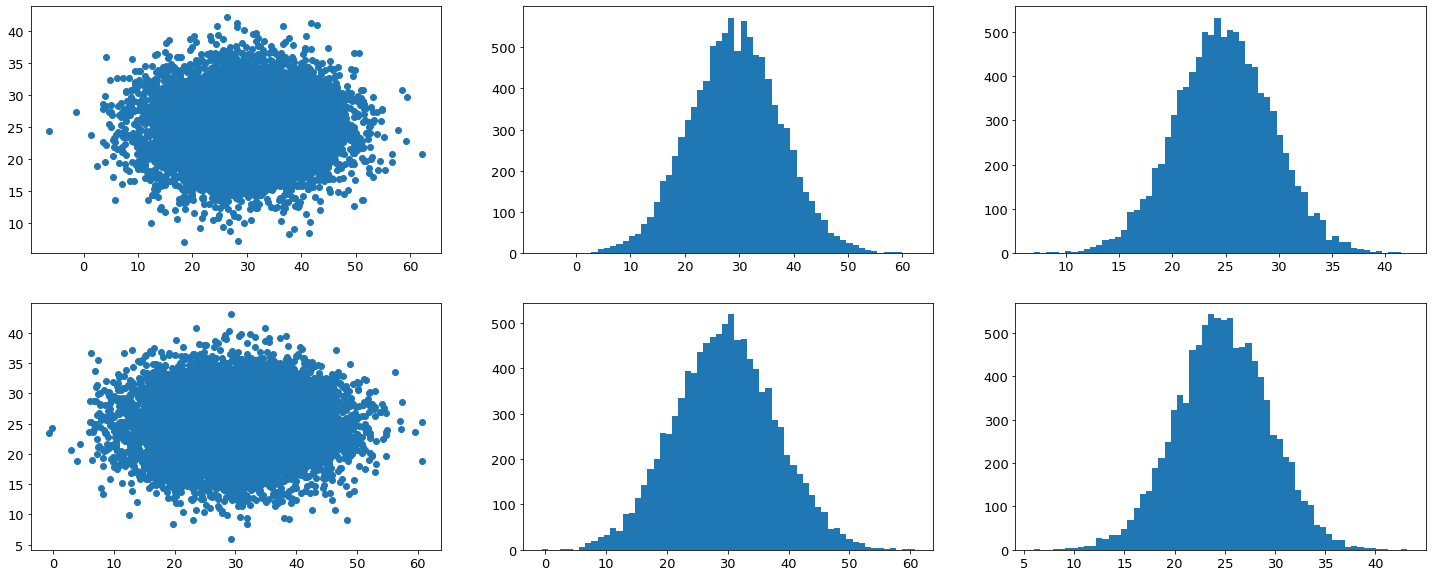

8.32029904253989
8.301150097266879
4.568902355829749
4.617268481006075


In [9]:

'''This fuction returns a multivariate normal array'''
rng = np.random.default_rng(100)
    #variances = np.square(std_devs) 
    #covariance_one = corr_coeff[0] * (std_devs[0] * std_devs[1]) 
    #covariance_two = corr_coeff[1] * (std_devs[2] * std_devs[3]) 
    
'''
mean = (45.4 ,67.3 ,164.7 ,29.4 ,127.7,78.8, 24.8)
covariance_matrix = [
    [1,     0.36, -0.23, 0.63,  0.46,  0.33, 0.44],
    [0.36,  1   ,  0.2,  0.73,  0.37,  0.36, 0.91],
    [-0.23, 0.2 ,  1,   -0.25, -0.00,  0.02,-0.16],
    [0.63,  0.73, -0.25, 1     ,0.39,  0.32, 0.81],
    [0.46,  0.37, -0.00, 0.39,  1,     0.7,  0.37],
    [0.33,  0.36,  0.02, 0.32,  0.7,   1,    0.35],
    [0.44,  0.91, -0.16, 0.81,  0.37,  0.35, 1]]
    '''

# fat%, BMI after 
mean = (29.4, 24.8) 
var1 = np.square(8.3)
var2 = np.square(4.6)
cor = 0.2

#covariance_matrix = [[np.square(8.3+4.6), 1], [1, np.square(4.6+8.3)]] 
covariance_matrix = [[var1, cor], [cor, var2]] 
multi_array = rng.multivariate_normal(mean, covariance_matrix, 10000)
fat_normal = rng.normal(29.4, 8.3, 10000)
bmi_normal = rng.normal(24.8, 4.6, 10000)

fig, ax = plt.subplots(2, 3, figsize = (25, 10), sharex = False, sharey = False)
ax[0, 0].scatter(multi_array[:,0], multi_array[:,1])
ax[0, 1].hist((multi_array[:,0]), bins = 60)
ax[0, 2].hist((multi_array[:,1]), bins = 60)

ax[1, 0].scatter(fat_normal, bmi_normal)
ax[1, 1].hist(fat_normal, bins = 60)
ax[1, 2].hist(bmi_normal, bins = 60)
plt.show()

print(np.std(multi_array[:,0]))
print(np.std(fat_normal))
print(np.std(multi_array[:,1]))
print(np.std(bmi_normal))

In [10]:
'''
Table 1
Basic sample characteristics – men.

Variable	Count	Mean	Standard deviation
BMI	120	26.8	3.9
Weight [kg]	120	84.4	13.2
Fat percentage	120	23.3	7.0
Age [years]	120	46.1	16.6
Height [cm]	120	176.9	7.6
BPs [mmHg]	120	133.1	17.0
BPd [mmHg]	120	82.5	11.6
BMI – Body Mass Index [kg/m2]; Fat percentage – percentage of total body fat [%]; BPs – systolic blood pressure; BPd – diastolic blood pressure.
''';

## References
[X] CDC, 2021, High Blood Pressure Symptoms and Causes, Available at:<br>
[Ref X](https://www.cdc.gov/bloodpressure/about.htm) (Accessed 08 December 2021).<br>

<br>

[X]. Singh, S, 2019, Getting the Basics of Correlation & Covariance, Available at:<br>
[Ref X](https://towardsdatascience.com/getting-the-basics-of-correlation-covariance-c8fc110b90b4) (Accessed 07 December 2021).


<br>

[X]. Justin, B, et al. (2013), Risk Models to Predict Hypertension: A Systematic Review, Plos One, Availabile at:<br>
[Ref X](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3702558/) (Accessed 08 December 2021).

<br>

[X]. Glen, S, 2021, What is a C-Statistic?, Statistics How To, Available at: <br>
[Ref X](https://www.statisticshowto.com/c-statistic/) (Accessed 09 December 2021).


<br>

[X].Papathanasiou, G et al. (2015), Association of High Blood Pressure with Body Mass Index, Smoking and Physical Activity in Healthy Young Adults,<br>
Available at: [Ref X](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4378027/) (Accessed 13 December 2021).


<br>

[X]. Boledovičová, M et al. (2013), Blood pressure relation to body composition and age: Analysis of a nurse-led investigation and consultation program,<br>
Available at: [Ref X](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3728227/) (Accessed 13 December 2021).
<br>


[X]. Brownlee, J, 2020, How to Choose a Feature Selection Method For Machine Learning, Available at:<br>
[Ref Link X](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/) (Accessed 13 December 2021).


<br>

[X]. Ren, Z et al (2020), A novel predicted model for hypertension based on a large cross-sectional study, Available at:<br>
[Ref Link X](https://www.nature.com/articles/s41598-020-64980-8) (Accessed 13 December 2021).


<br>



<br>



<br>



<br>



<br>
